In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
from glob import glob
import os
import pandas as pd
from fastcore.xtras import load_pickle, save_pickle

import matplotlib.pyplot as plt
import matplotx

from gptchem.plotsettings import *
from gptchem.plotutils import *

from scipy.stats import sem

In [3]:
results = glob('results/*')

In [9]:
all_results = []

for result in results:
    result = load_pickle(result)
    compiled = {
        'accuracy': result['accuracy'],
        'kappa': result['kappa'],
        'f1_macro': result['f1_macro'],
        'f1_micro': result['f1_micro'],
        'fine_tune_time': result['fine_tune_time'],
        'inference_time': result['inference_time'],
        'model_name': result['model_name'],
        'train_size': result['train_size'],
    }
    all_results.append(compiled)

In [10]:
df = pd.DataFrame(all_results)

In [22]:
import numpy as np 

In [25]:
df['kappa'].replace({'None': np.nan}, inplace=True)
df['f1_macro'].replace({'None': np.nan}, inplace=True)
df['kappa'] = df['kappa'].astype(float)
df['f1_macro'] = df['f1_macro'].astype(float)

In [34]:
grouped = df.groupby(['model_name', 'train_size']).agg(['mean', 'std', sem])

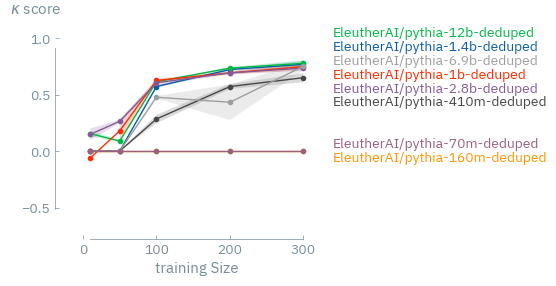

In [49]:
metric = 'kappa'

fig, ax = plt.subplots()

for model_name in grouped.index.levels[0]:
    subset = grouped.loc[model_name]
    ax.plot(
        subset.index, 
        subset[metric]['mean'], 
        label=model_name,
        marker='o', 
    )

    ax.fill_between(
        subset.index,
        subset[metric]['mean'] - subset[metric]['sem'],
        subset[metric]['mean'] + subset[metric]['sem'],
        alpha=0.2
    )
    

range_frame(
    ax, 
    np.array([df['train_size'].min(), df['train_size'].max()]),
    np.array([df[metric].min(), df[metric].max()])
)

matplotx.line_labels(ax)
ax.set_xlabel('training Size')
ylabel_top("$\kappa$ score", ax, y_pad=0.01)

fig.savefig('kappa_learning_curves.pdf', bbox_inches='tight')